# [MAC0417] Visão e Processamento de Imagens - Exercício Programa 2.1
*16 de Novembro de 2020*

## Introdução 
Na primeira parte deste exercício programa, produzimos uma base de imagens aumentada a partir das banco de dados do **EP1**, aplicando alguns filtros. Então geramos visualizações dos dados.

Integrantes do grupo:

| Nome | NUSP |
|------|------|
| Daniela Favero | 10277443 |
| Mateus Barbosa | 8993368 |
| Vitor Guidi | 8038091 |

A base de dados e os metadados se encontram no nosso repositório do [GitHub](https://github.com/danigfavero/Visao-computacional-e-processamento-de-imagens).

## Data Augmentation

Para gerar uma base de dados aumentada, aplicaremos 5 filtros em nosso banco de imagens inicial (de tamanho 1080 imagens).

### Organizando diretórios para o banco de imagens

Para poupar uso de internet ao executar o Notebook, vamos armazenar os resultados da *data augmentation* localmente. Para isto, primeiramente criaremos diretórios para organizar nosso banco de imagens.

In [2]:
import os
filters = ["grayscale/", "exp/", "log/", "mean/", "gradient/"]
objs = ["colheres",
            "garfos",
            "canecas",
            "facas",
            "panelas",
            "frigideiras",
            "controles_remotos",
            "calcas",
            "casacos",
            "camisetas"]

for filt in filters:
    try:
        os.mkdir(filt)
    except FileExistsError:
        continue

for filt in filters:
    for obj in objs:
        try:
            os.mkdir(filt + obj)
        except FileExistsError:
            continue

### Definindo um Aplicador de Filtros

A função `data_augmentation()` abaixo aplica o filtro (dado pela função `func`) em todas as imagens cujo caminho é dado pelo prefixo `url_prefix` (que pode se referir a uma URL ou a um arquivo local), salvando-as no diretório
`directory`. Isso é feito gerando-se, programaticamente, os nomes correspondentes a todas as combinações de classes de imagem.

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
from skimage import io
import warnings

def data_augmentation(url_prefix, directory, func):
    warnings.filterwarnings("ignore")
    objs = ["colheres/COLHER",
            "garfos/GARFO",
            "canecas/CANECA",
            "facas/FACA",
            "panelas/PANELA",
            "frigideiras/FRIGIDEIRA",
            "controles_remotos/CONTROLE",
            "calcas/CALCA",
            "casacos/CASACO",
            "camisetas/CAMISETA"]
    times = ["NOITE", "DIA"]
    illums = [ "INDOOR", "OUTDOOR" ]
    backgrounds = [ "CLARO", "MADEIRA", "ESCURO" ]
    repeats = ["a", "b", "c"]
    nums = ['1', '2', '3']

    path = directory
    
    suffixes = list(map("".join, itertools.product(*[backgrounds, nums, repeats, [".jpg"]])))
    
    for it in itertools.product(*[objs, times, illums, suffixes]):
        suffix = "_".join(it)
        url = url_prefix + suffix
        path = directory + suffix
        for _ in range(3): # evitando erros de conexão (3 tentativas)
            try:
                img = io.imread(url).astype(np.uint8)
                img = func(img)
                io.imsave(path, img)
            except ConnectionResetError:
                continue
            break

### 1. Grayscale

Nesta primeira chamada a `data_augmentation()`, geramos o banco de imagens em níveis de cinza, que servirá de base para aplicar os demais filtros. `url_prefix` contém o endereço do `dataset` original em nosso repositório.

In [ ]:
from skimage.color import rgb2gray
url_prefix = "https://raw.githubusercontent.com/danigfavero/Visao-computacional-e-processamento-de-imagens/master/original_dataset/"

gray_prefix = "grayscale/"
data_augmentation(url_prefix, gray_prefix, rgb2gray)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

url https://raw.githubusercontent.com/danigfavero/Visao-computacional-e-processamento-de-imagens/master/original_dataset/calcas/CALCA_DIA_OUTDOOR_ESCURO1a.jpg deu alguma excecao


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

url https://raw.githubusercontent.com/danigfavero/Visao-computacional-e-processamento-de-imagens/master/original_dataset/casacos/CASACO_NOITE_INDOOR_CLARO2a.jpg deu alguma excecao


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

url https://raw.githubusercontent.com/danigfavero/Visao-computacional-e-processamento-de-imagens/master/original_dataset/casacos/CASACO_DIA_INDOOR_MADEIRA2b.jpg deu alguma excecao


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

### 2. Filtro Exponencial

A função `gray_exp()` gera um filtro exponencial, dado por $y = e^{c \cdot x} - 1$, em que $y$ é a intensidade de nível de cinza da saída do filtro, e $x$, da entrada. O valor $c = 0.0217$ foi calculado fixando
$y = 255$ para $x = 255$.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

prefix = "grayscale/"
def gray_exp(img, c=0.0217):
    return (np.exp(c * img) - 1).astype(np.uint8)

data_augmentation(prefix, 'exp/', gray_exp)

### 3. Filtro logarítmico

A função `gray_log()` gera um filtro logarítmico, dado por $y = c \cdot \log{x + 1}$, em que $y$ é a intensidade de nível de cinza da saída do filtro, e $x$, da entrada. O valor $c = 45.986$ foi calculado fixando
$y = 255$ para $x = 255$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

prefix = "grayscale/"
def gray_log(img, c=45.986):
    return (c * np.log(img + 1)).astype(np.uint8)

data_augmentation(prefix, 'log/', gray_log)

<ipython-input-11-84cd816378c6>:6: RuntimeWarning: divide by zero encountered in log
  return (c * np.log(img + 1)).astype(np.uint8)


FileNotFoundError: No such file: '/home/dani/Documents/Visao-computacional-e-processamento-de-imagens/grayscale/frigideiras/FRIGIDEIRA_DIA_OUTDOOR_CLARO3c.jpg'

### 4. O Filtro da Média

A função `gray_mean()` implementa o filtro da média, convoluindo o kernel
$$ \text{kernel} =
    \begin{bmatrix}
        \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
        \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
        \frac{1}{9} & \frac{1}{9} & \frac{1}{9}
    \end{bmatrix}
$$
com a imagem, de modo a implementar a média do nível de cinza do pixel com seus 8 vizinhos.
A função `convolve2d` realiza padding com `fillvalue = 0` por padrão. Utilizamos a opção `mode='same'` para
garantir que o tamanho da imagem seja preservado.

In [12]:
import numpy as np
from scipy.signal import convolve2d

prefix = "grayscale/"

def gray_mean(img):
    kernel = np.array([[1/9,1/9,1/9], [1/9,1/9,1/9], [1/9,1/9,1/9]])
    return (convolve2d(img, kernel, mode='same')).astype(np.uint8)

data_augmentation(prefix, 'mean/', gray_mean)

<ipython-input-8-0d9bea25c284>:35: UserWarning: mean/colheres/COLHER_NOITE_OUTDOOR_ESCURO3b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-8-0d9bea25c284>:35: UserWarning: mean/colheres/COLHER_NOITE_OUTDOOR_ESCURO3c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-8-0d9bea25c284>:35: UserWarning: mean/garfos/GARFO_NOITE_OUTDOOR_MADEIRA3a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-8-0d9bea25c284>:35: UserWarning: mean/garfos/GARFO_NOITE_OUTDOOR_MADEIRA3b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-8-0d9bea25c284>:35: UserWarning: mean/garfos/GARFO_NOITE_OUTDOOR_MADEIRA3c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-8-0d9bea25c284>:35: UserWarning: mean/garfos/GARFO_NOITE_OUTDOOR_ESCURO3a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-8-0d9bea25c284>:35: UserWarning: mean/garfos/GARFO_NOITE_OUTDOOR_ESCURO3b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-in

FileNotFoundError: No such file: '/home/dani/Documents/Visao-computacional-e-processamento-de-imagens/grayscale/frigideiras/FRIGIDEIRA_DIA_OUTDOOR_CLARO3c.jpg'

### 5. Gradiente

A função `gradient()` implementa a soma da imagem com um gradiente de cinza, dado pela função:
$$
    r(x, y) = c \sqrt{\left(x - \frac{w}{2}\right)^2 + \left(y - \frac{h}{2}\right)^2}
$$
Em que $w,h$ são as dimensões da imagem e $c$ é uma constante de normalização, que garante que
$0 \leq r(x, y) \leq 255$. Fazemos a intensidade do nível de cinza de $r(x,y)$ proporcional à distância do centro
do retângulo a $(x,y)$.

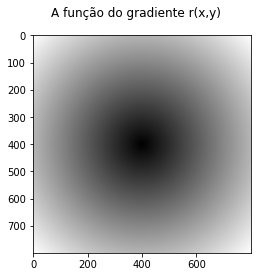

FileNotFoundError: No such file: '/home/dani/Documents/Visao-computacional-e-processamento-de-imagens/grayscale/frigideiras/FRIGIDEIRA_DIA_OUTDOOR_CLARO3c.jpg'

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np

prefix = "grayscale/"

class Radial:
    def __init__(self, h, w):
        self.h = h
        self.w = w
    def radial(self, x, y):
        max_dist = math.sqrt((self.w / 2.0) ** 2 + (self.h / 2.0) ** 2)
        return (255.0 / max_dist) * np.sqrt((x - self.w / 2.0) ** 2 + (y - self.h / 2.0) ** 2)
    def plot(self):
        x = np.arange(0, self.w, 1)
        y = np.arange(0, self.h, 1)
        r = np.array([ self.radial(i, y) for i in x ])
        plt.imshow(r, cmap='gray', vmin=0, vmax=255)
        plt.suptitle('A função do gradiente r(x,y)')
        plt.show()

def gradient(img):
    h,w = img.shape
    r = Radial(h,w)
    grad = np.fromfunction(r.radial, img.shape)
    return ((img + grad) / 2.0).astype(np.uint8)

r = Radial(800, 800)
r.plot()
data_augmentation(prefix, 'gradient/', gradient)

## Visualização

Agora, utilizaremos funções MNIST-like para visualizar nossa base de dados. Para facilitar a visualização, apenas 50 imagens serão mostradas dentre as 5040.

FileNotFoundError: No such file: '/home/dani/Documents/Visao-computacional-e-processamento-de-imagens/grayscale/controles_remotos/CONTROLE_NOITE_INDOOR_CLARO2a.jpg'

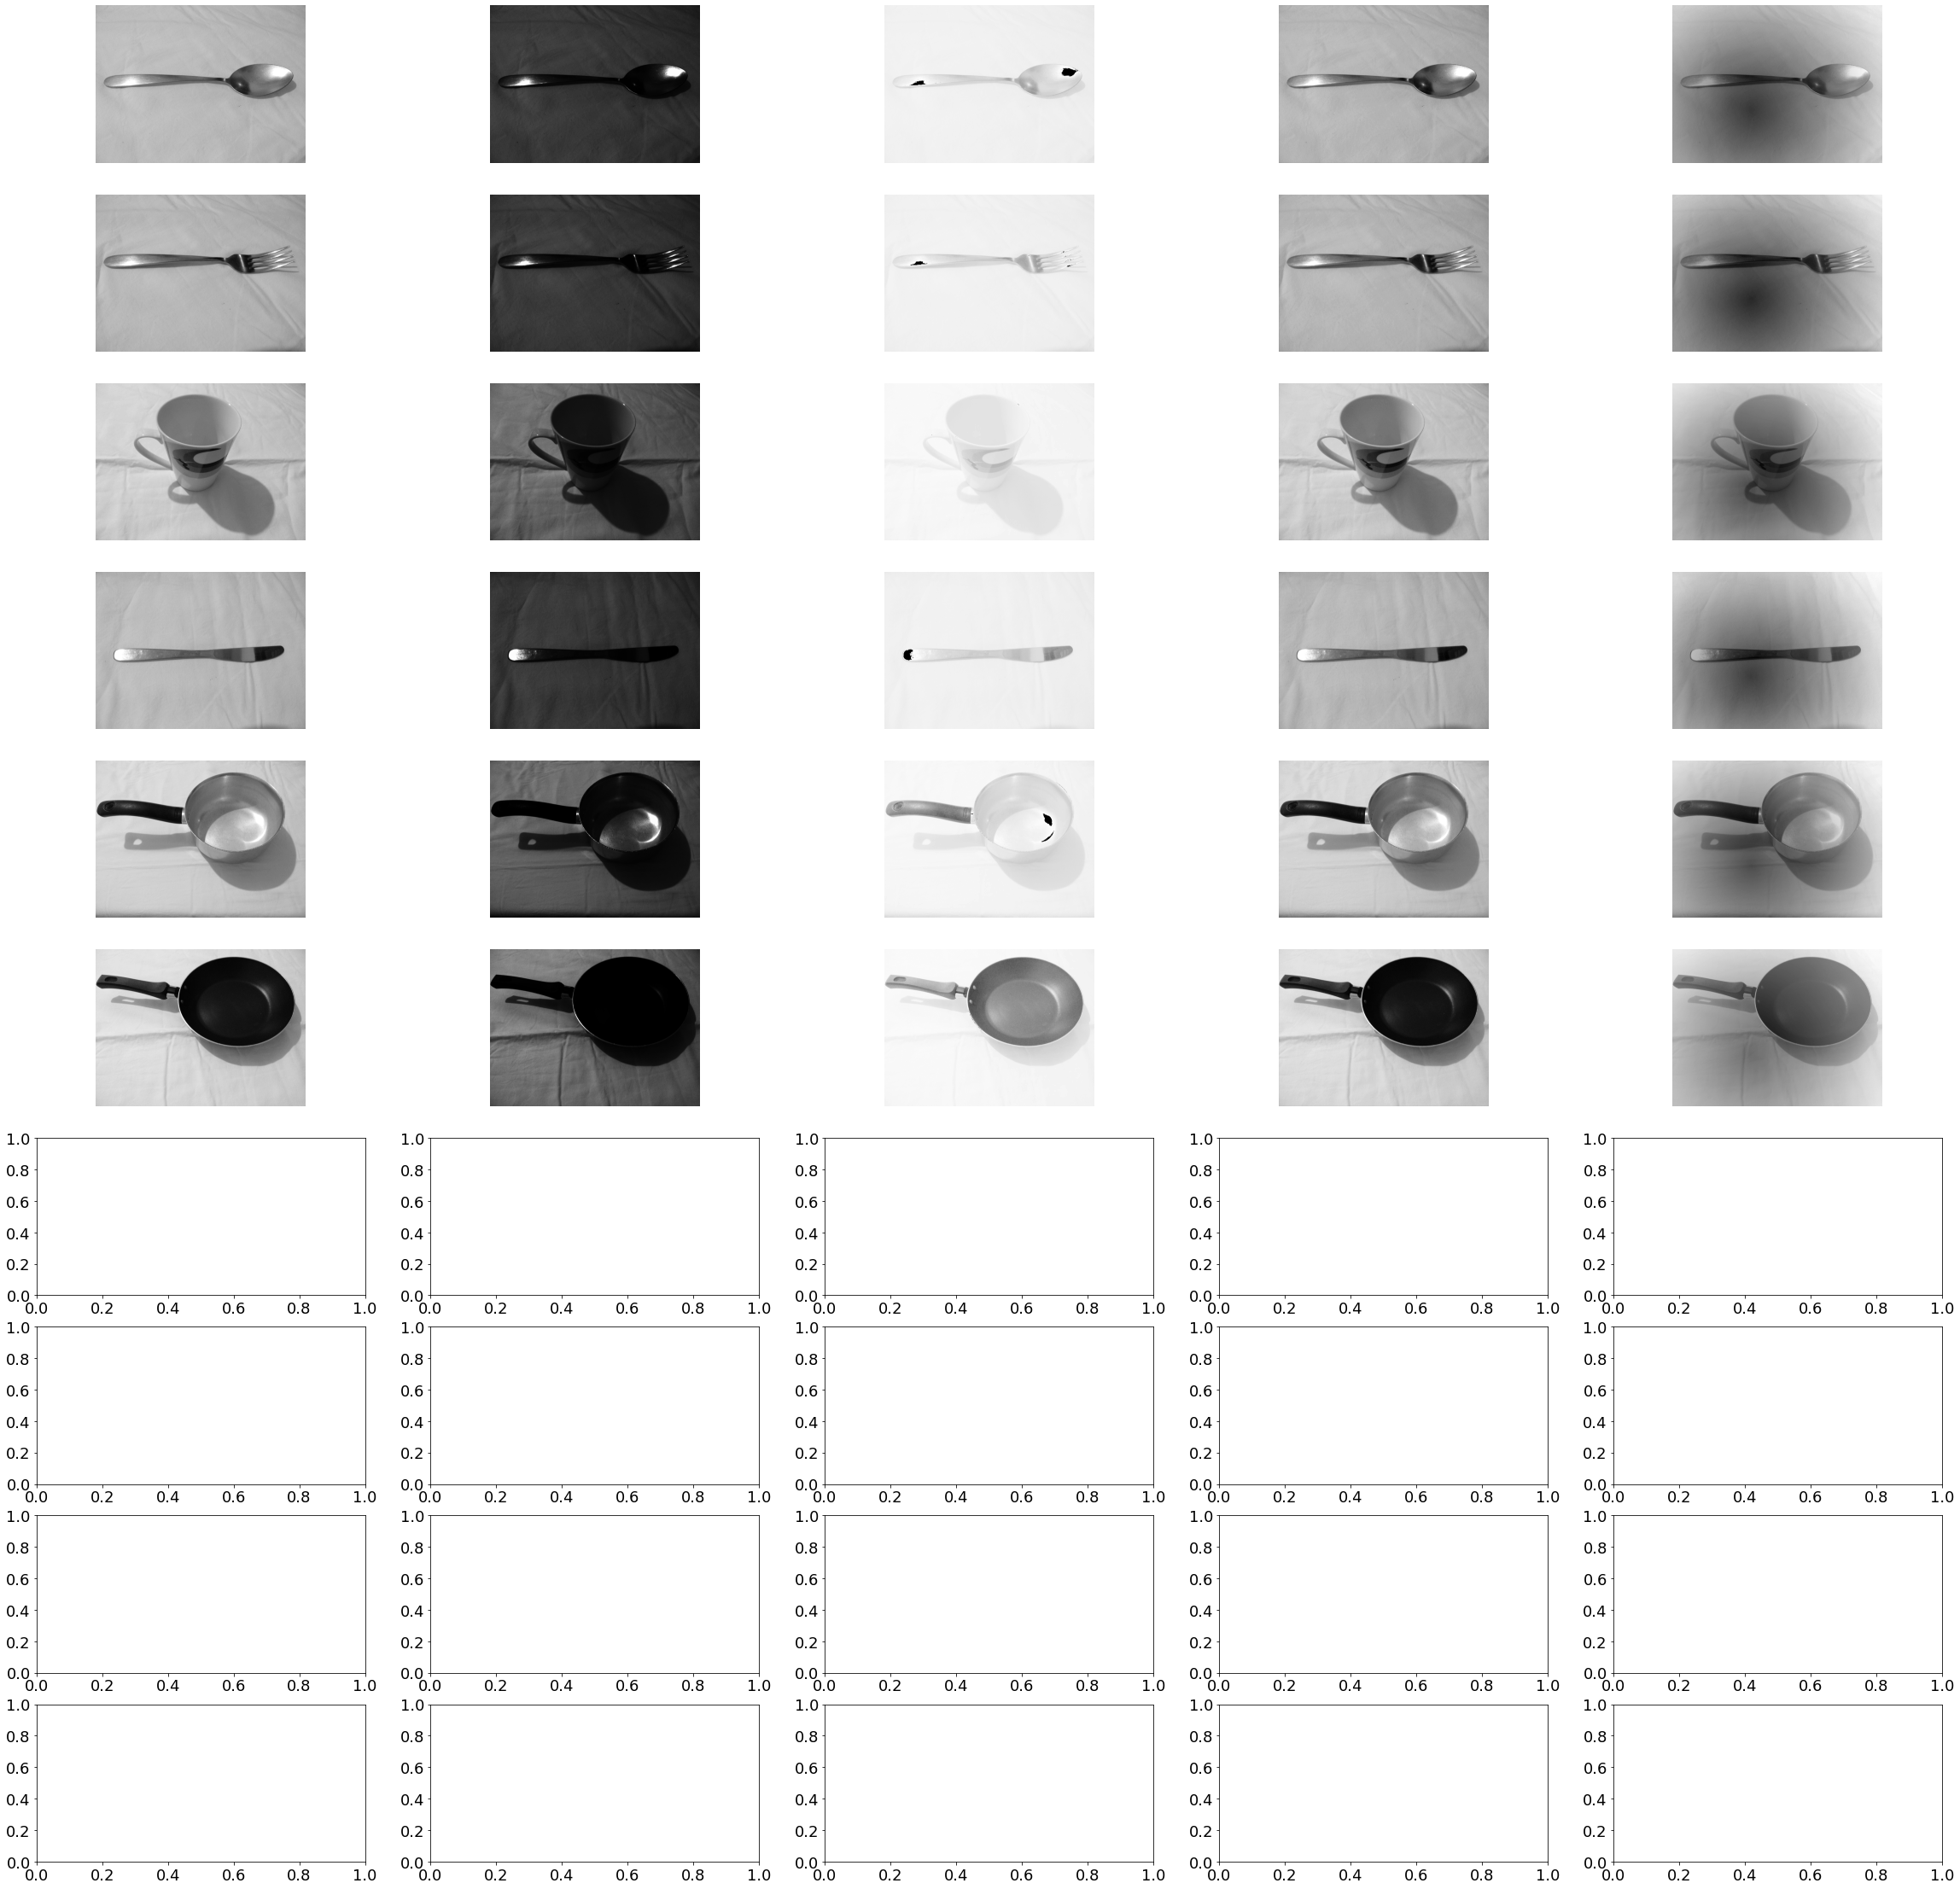

In [14]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import io

def view_dataset():
    matplotlib.rcParams['font.size'] = 18
    directories = [ "grayscale/", "exp/", "log/", "mean/", "gradient/" ]
    objs = ["colheres/COLHER",
            "garfos/GARFO",
            "canecas/CANECA",
            "facas/FACA",
            "panelas/PANELA",
            "frigideiras/FRIGIDEIRA",
            "controles_remotos/CONTROLE",
            "calcas/CALCA",
            "casacos/CASACO",
            "camisetas/CAMISETA"]

    fig, axes = plt.subplots(len(objs), len(directories), figsize=(40, 40))
    for i in range(len(objs)):
        for j in range(len(directories)):
            #path = directories[j] + objs[i] + "_DIA_INDOOR_MADEIRA2a.jpg"
            path = directories[j] + objs[i] + "_NOITE_INDOOR_CLARO2a.jpg"
            for _ in range(3): # evitando erros de conexão (3 tentativas)
                try:
                    img = io.imread(path)
                except ConnectionResetError:
                    continue
                break
            axes[i, j].imshow(img, cmap=plt.cm.gray)
            axes[i, j].axis('off')
    fig.tight_layout()
    plt.show()

view_dataset()